In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from scipy.stats import shapiro
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [2]:
# Load final data
final_data_df = pd.read_csv('./final_data.csv')

# Make the data unique by subjectID
final_data_participants_df = final_data_df.drop_duplicates(subset=["SubjectID"], keep="last")
# Filter out the columns that are needed for the participants data
participants_columns = ["SubjectID", "nickname","DataProtectionAgreement","LiabilityWaiverSigned","HasPacemaker",
                        "Age","Gender","ExperienceWithEMS","ExperienceWithVR","HandDominance","Colorblindness","Calibration Arm","Calibration Hand"]
final_data_participants_df = final_data_participants_df[participants_columns]
# Filter out participants who according to their anwser to certain questions
# and therefore are not eligible for the study
final_data_df = final_data_df[final_data_df['DataProtectionAgreement'] == True]
final_data_df = final_data_df[final_data_df['LiabilityWaiverSigned'] == True]
final_data_df = final_data_df[final_data_df['HasPacemaker'] == False]
final_data_df = final_data_df[final_data_df['Colorblindness'] == False]
final_data_df = final_data_df[final_data_df['HandDominance'] == 'right']

In [3]:
formula = 'TotalTime ~ C(Condition) * C(ExperienceWithEMS)'
model = ols(formula, data=final_data_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(formula)
print(aov_table)

formula = 'ErrorCount ~ C(Condition) * C(ExperienceWithEMS)'
model = ols(formula, data=final_data_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(formula)
print(aov_table)


TotalTime ~ C(Condition) * C(ExperienceWithEMS)
                                         sum_sq    df          F    PR(>F)
C(Condition)                        3003.663020   3.0   1.747937  0.169786
C(ExperienceWithEMS)                8874.187301   1.0  15.492601  0.000267
C(Condition):C(ExperienceWithEMS)    510.381619   3.0   0.297009  0.827367
Residual                           27494.479329  48.0        NaN       NaN
ErrorCount ~ C(Condition) * C(ExperienceWithEMS)
                                      sum_sq    df         F    PR(>F)
C(Condition)                        1.857143   3.0  0.343518  0.793955
C(ExperienceWithEMS)                9.523810   1.0  5.284889  0.025907
C(Condition):C(ExperienceWithEMS)   2.976190   3.0  0.550509  0.650248
Residual                           86.500000  48.0       NaN       NaN


## TotalTime:
- 'Condition': Not significant (p = 0.1698).
- 'ExperienceWithEMS': Significant (p = 0.0003), indicating a substantial main effect of experience with EMS on TotalTime.
- Interaction between 'Condition' and 'ExperienceWithEMS': Not significant (p = 0.8274).
## ErrorCount:
- 'Condition': Not significant (p = 0.7940).
- 'ExperienceWithEMS': Significant (p = 0.0259), suggesting a meaningful main effect of experience with EMS on - ErrorCount.
- Interaction: Not significant (p = 0.6502).

In [4]:

formula = 'TotalTime ~ C(Condition) * C(ExperienceWithVR)'
model = ols(formula, data=final_data_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(formula)
print(aov_table)

formula = 'ErrorCount ~ C(Condition) * C(ExperienceWithVR)'
model = ols(formula, data=final_data_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(formula)
print(aov_table)

TotalTime ~ C(Condition) * C(ExperienceWithVR)
                                        sum_sq    df         F    PR(>F)
C(Condition)                       3003.663020   3.0  1.362350  0.265535
C(ExperienceWithVR)                 478.684990   1.0  0.651341  0.423615
C(Condition):C(ExperienceWithVR)   1124.106344   3.0  0.509853  0.677385
Residual                          35276.256915  48.0       NaN       NaN
ErrorCount ~ C(Condition) * C(ExperienceWithVR)
                                     sum_sq    df         F    PR(>F)
C(Condition)                       1.857143   3.0  0.330322  0.803433
C(ExperienceWithVR)                6.501587   1.0  3.469226  0.068647
C(Condition):C(ExperienceWithVR)   2.542857   3.0  0.452287  0.716866
Residual                          89.955556  48.0       NaN       NaN


## TotalTime:
- All effects are non-significant, including the interaction (p = 0.6774).
## ErrorCount:
- All effects are non-significant, including the interaction (p = 0.7169), although 'ExperienceWithVR' is borderline significant (p = 0.0686).

In [5]:
formula = 'TotalTime ~ C(Condition) * C(Age)'
model = ols(formula, data=final_data_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(formula)
print(aov_table)

formula = 'ErrorCount ~ C(Condition) * C(Age)'
model = ols(formula, data=final_data_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(formula)
print(aov_table)

TotalTime ~ C(Condition) * C(Age)
                           sum_sq    df         F    PR(>F)
C(Condition)          3003.663020   3.0  1.547336  0.224214
C(Age)               10384.876212   6.0  2.674882  0.035234
C(Condition):C(Age)   8376.456803  18.0  0.719188  0.764652
Residual             18117.715233  28.0       NaN       NaN
ErrorCount ~ C(Condition) * C(Age)
                        sum_sq    df         F    PR(>F)
C(Condition)          1.857143   3.0  0.374101  0.772323
C(Age)               20.565476   6.0  2.071343  0.088972
C(Condition):C(Age)  32.101190  18.0  1.077738  0.418826
Residual             46.333333  28.0       NaN       NaN


## TotalTime:
- 'Condition': Not significant (p = 0.2242).
- 'Age': Significant (p = 0.0352), showing that age has a main effect on TotalTime.
Interaction: Not significant (p = 0.7647).
## ErrorCount:
- All effects are non-significant, although 'Age' is borderline significant (p = 0.0890).

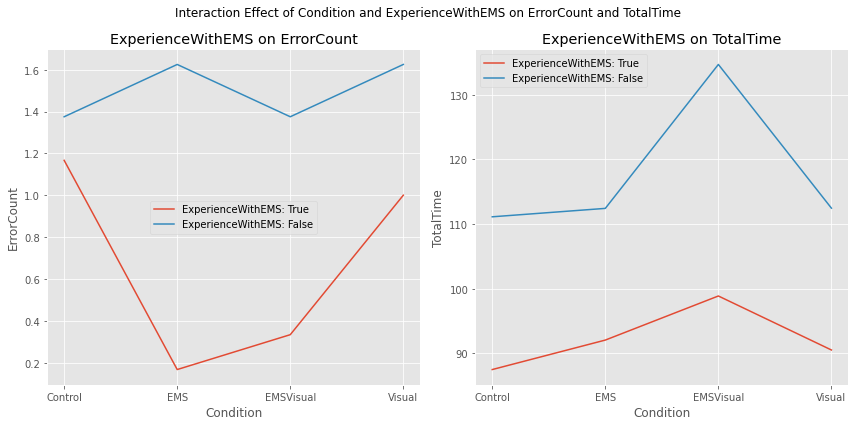

In [6]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
plt.suptitle('Interaction Effect of Condition and ExperienceWithEMS on ErrorCount and TotalTime')

plt.subplot(1, 2, 1)

for exp_ems in final_data_df['ExperienceWithEMS'].unique():
    subset = final_data_df[final_data_df['ExperienceWithEMS'] == exp_ems]
    plt.plot(subset.groupby('Condition')['ErrorCount'].mean(), label=f'ExperienceWithEMS: {exp_ems}')
plt.legend()
plt.xlabel('Condition')
plt.ylabel('ErrorCount')
plt.title('ExperienceWithEMS on ErrorCount')

plt.subplot(1, 2, 2)

for exp_ems in final_data_df['ExperienceWithEMS'].unique():
    subset = final_data_df[final_data_df['ExperienceWithEMS'] == exp_ems]
    plt.plot(subset.groupby('Condition')['TotalTime'].mean(), label=f'ExperienceWithEMS: {exp_ems}')

plt.legend()
plt.xlabel('Condition')
plt.ylabel('TotalTime')
plt.title('ExperienceWithEMS on TotalTime')

plt.tight_layout()
plt.show()

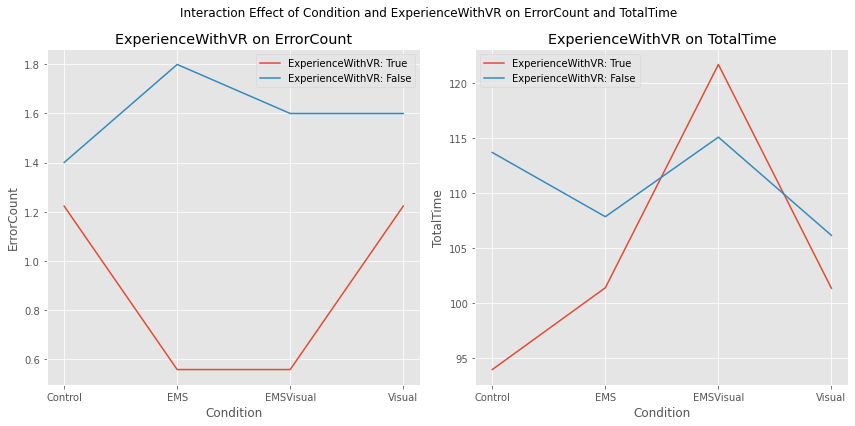

In [7]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
plt.suptitle('Interaction Effect of Condition and ExperienceWithVR on ErrorCount and TotalTime')

plt.subplot(1, 2, 1)

for exp_ems in final_data_df['ExperienceWithVR'].unique():
    subset = final_data_df[final_data_df['ExperienceWithVR'] == exp_ems]
    plt.plot(subset.groupby('Condition')['ErrorCount'].mean(), label=f'ExperienceWithVR: {exp_ems}')
plt.legend()
plt.xlabel('Condition')
plt.ylabel('ErrorCount')
plt.title('ExperienceWithVR on ErrorCount')

plt.subplot(1, 2, 2)

for exp_ems in final_data_df['ExperienceWithVR'].unique():
    subset = final_data_df[final_data_df['ExperienceWithVR'] == exp_ems]
    plt.plot(subset.groupby('Condition')['TotalTime'].mean(), label=f'ExperienceWithVR: {exp_ems}')

plt.legend()
plt.xlabel('Condition')
plt.ylabel('TotalTime')
plt.title('ExperienceWithVR on TotalTime')

plt.tight_layout()
plt.show()

# Hypotheses 3

Hypothesis 3 (H3): The Visual + EMS group will show significant interaction effects by performing better (fewer errors, task completion time), reporting lower task load (NASA TLX scores), and having a better user experience (UEQ-S measures) than the group experiencing only the control conditions.

In [8]:
import pandas as pd

# Load NASA TLX data
main_data = pd.read_csv("final_data.csv")

# Load TLX data
tlx_data = pd.read_csv("tlx_final.csv")

# Load UEQS data
ueqs_data = pd.read_csv("ueq_final.csv")

In [9]:
for column in ['TLX_MentalDemand', 'TLX_PhysicalDemand', 'TLX_TimeDemand', 'TLX_Performance', 'TLX_Effort', 'TLX_Frustration', 'Overall']:
    print(f'Normality test for {column}:')
    for condition in tlx_data['Condition'].unique():
        condition_data = tlx_data[tlx_data['Condition'] == condition][column]
        stat, p = shapiro(condition_data)
        print(f'  {condition}: W = {stat}, p = {p}')

Normality test for TLX_MentalDemand:
  Control: W = 0.9079522490501404, p = 0.1471533328294754
  Visual: W = 0.9174318909645081, p = 0.20192855596542358
  EMS: W = 0.8335591554641724, p = 0.013384945690631866
  EMSVisual: W = 0.7988221645355225, p = 0.0048263841308653355
Normality test for TLX_PhysicalDemand:
  Control: W = 0.9221084713935852, p = 0.2357734590768814
  Visual: W = 0.8805966973304749, p = 0.059264153242111206
  EMS: W = 0.8990062475204468, p = 0.10910126566886902
  EMSVisual: W = 0.944977343082428, p = 0.48576340079307556
Normality test for TLX_TimeDemand:
  Control: W = 0.9529398679733276, p = 0.6072104573249817
  Visual: W = 0.8651326894760132, p = 0.035871971398591995
  EMS: W = 0.9163253903388977, p = 0.1946297287940979
  EMSVisual: W = 0.9254246354103088, p = 0.2629390358924866
Normality test for TLX_Performance:
  Control: W = 0.9419392943382263, p = 0.44373732805252075
  Visual: W = 0.9195436239242554, p = 0.21659445762634277
  EMS: W = 0.9078394174575806, p = 0.1

In [10]:
from scipy.stats import shapiro


ueq_control = pd.read_csv('./ueq_results/ueq_control.csv')
ueq_visual = pd.read_csv('./ueq_results/ueq_visual.csv')
ueq_ems = pd.read_csv('./ueq_results/ueq_ems.csv')
ueq_ems_visual = pd.read_csv('./ueq_results/ueq_emsvisual.csv')

for column in ueq_control.columns:
        print(f'Normality test for {column}:')
        for condition, data in {"Control":ueq_control, "Visual":ueq_visual, "EMS":ueq_ems, "EMSVisual":ueq_ems_visual}.items():
                stat, p = shapiro(data[column])
                print(f'{column}: W = {stat}, p = {p}')

Normality test for UEQ_behindernd_unterstützend:
UEQ_behindernd_unterstützend: W = 0.9492701292037964, p = 0.5494317412376404
UEQ_behindernd_unterstützend: W = 0.9107153415679932, p = 0.1614004224538803
UEQ_behindernd_unterstützend: W = 0.9071316719055176, p = 0.1431681215763092
UEQ_behindernd_unterstützend: W = 0.8724063634872437, p = 0.04536185413599014
Normality test for UEQ_kompliziert_einfach:
UEQ_kompliziert_einfach: W = 0.8490319848060608, p = 0.0215486828237772
UEQ_kompliziert_einfach: W = 0.8212462663650513, p = 0.009252323769032955
UEQ_kompliziert_einfach: W = 0.8946346044540405, p = 0.09429733455181122
UEQ_kompliziert_einfach: W = 0.9329599738121033, p = 0.33556321263313293
Normality test for UEQ_ineffizient_effizient:
UEQ_ineffizient_effizient: W = 0.9000949859619141, p = 0.11314263939857483
UEQ_ineffizient_effizient: W = 0.8656283020973206, p = 0.036447156220674515
UEQ_ineffizient_effizient: W = 0.9014630317687988, p = 0.11843664199113846
UEQ_ineffizient_effizient: W = 0.9

In [11]:
# For ErrorCount with Condition and ExperienceWithEMS
model_error = smf.glm("ErrorCount ~ C(Condition) * C(ExperienceWithEMS)", data=main_data, family=sm.families.Poisson()).fit()
print(model_error.summary())

# For TotalTime with Condition and ExperienceWithEMS
model_time = smf.glm("TotalTime ~ C(Condition) * C(ExperienceWithEMS)", data=main_data, family=sm.families.Gaussian()).fit()
print(model_time.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             ErrorCount   No. Observations:                   60
Model:                            GLM   Df Residuals:                       52
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -79.959
Date:                Sun, 03 Sep 2023   Deviance:                       79.451
Time:                        09:53:26   Pearson chi2:                     79.7
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2864
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

## Model for ErrorCount
The model is using the Poisson family, which is appropriate for count data like error counts.

### Main Effects:
- Condition: There are no significant main effects for the different conditions (EMS, EMSVisual, Visual) as the p-values are greater than 0.05.
- ExperienceWithEMS: Also, no significant effect, with a p-value of 0.510.
### Interaction Effects:
- Condition:ExperienceWithEMS: Some interactions have p-values less than 0.1 (e.g., EMS:ExperienceWithEMS with p = 0.065), which may indicate a trend, but they are not statistically significant at the conventional 0.05 level.
Model for TotalTime
This model is using the Gaussian family, suitable for continuous outcomes like total time.

### Main Effects:
- Condition: Only the EMSVisual condition shows a significant effect (p = 0.041) on TotalTime.
- ExperienceWithEMS: The p-value of 0.060 indicates a trend but is not significant at the 0.05 level.
### Interaction Effects:
- Condition:ExperienceWithEMS: No significant interaction effects.


## Conclusion Regarding H3
The part of H3 that predicted the Visual + EMS group would perform better in terms of fewer errors is not supported by these results.
The part of H3 that predicted the Visual + EMS group would perform better in terms of task completion time is supported for the EMSVisual condition.

In [12]:
# Iterate through TLX columns
for column in tlx_data.columns[:-2]:
    kruskal_result = kruskal(tlx_data[column][tlx_data['Condition'] == 'Control'],
                             tlx_data[column][tlx_data['Condition'] == 'Visual'],
                             tlx_data[column][tlx_data['Condition'] == 'EMS'],
                             tlx_data[column][tlx_data['Condition'] == 'EMSVisual'])
    print(f"{column}: {kruskal_result}")

# Iterate through UEQS columns
for column in ueqs_data.columns[1:]:
    kruskal_result = kruskal(ueqs_data[column][ueqs_data['Condition'] == 'Control'],
                             ueqs_data[column][ueqs_data['Condition'] == 'Visual'],
                             ueqs_data[column][ueqs_data['Condition'] == 'EMS'],
                             ueqs_data[column][ueqs_data['Condition'] == 'EMSVisual'])
    print(f"{column}: {kruskal_result}")


TLX_MentalDemand: KruskalResult(statistic=0.7624396693240119, pvalue=0.858428228946744)
TLX_PhysicalDemand: KruskalResult(statistic=3.1488239065042554, pvalue=0.3692437310237524)
TLX_TimeDemand: KruskalResult(statistic=0.530862468800964, pvalue=0.9120605893134287)
TLX_Performance: KruskalResult(statistic=0.050944944571091964, pvalue=0.9969880858832668)
TLX_Effort: KruskalResult(statistic=0.8151112990544224, pvalue=0.8458493004422687)
TLX_Frustration: KruskalResult(statistic=3.955173311203949, pvalue=0.2663454639849037)
Pragmatic Quality: KruskalResult(statistic=3.0, pvalue=0.3916251762710877)
SD Pragmatic Quality: KruskalResult(statistic=3.0, pvalue=0.3916251762710877)
SE Pragmatic Quality: KruskalResult(statistic=3.0, pvalue=0.3916251762710877)
Hedonic Quality: KruskalResult(statistic=3.0, pvalue=0.3916251762710877)
SD Hedonic Quality: KruskalResult(statistic=3.0, pvalue=0.3916251762710877)
SE Hedonic Quality: KruskalResult(statistic=3.0, pvalue=0.3916251762710877)
Overall: KruskalRes

For TLX Scores: The p-values for all the TLX variables are greater than 0.05, indicating that there are no statistically significant differences across the different conditions. This does not support the part of H3 that predicts differences in task load (NASA TLX scores).

For UEQS Measures: Similar to the TLX scores, the p-values for pragmatic quality, hedonic quality, and overall measures are greater than 0.05, indicating no statistically significant differences across the different conditions. This does not support the part of H3 that predicts differences in user experience (UEQ-S measures).

In [13]:
tlx_ueq_columns = ['UEQ_behindernd_unterstützend', 'UEQ_kompliziert_einfach', 'UEQ_ineffizient_effizient', 'UEQ_verwirrend_übersichtlich', 'UEQ_langweilig_spannend', 'UEQ_uninteressant_interessant',
                   'UEQ_konventionell_originell', 'UEQ_herkömmlich_neuartig', 'TLX_MentalDemand', 'TLX_PhysicalDemand', 'TLX_TimeDemand', 'TLX_Performance', 'TLX_Effort', 'TLX_Frustration']
main_data_without_tlx_ueq = final_data_df.drop(tlx_ueq_columns, axis=1)

ueqs_data = ueqs_data.rename(columns={'Overall': 'UEQ_Overall'})
tlx_data = tlx_data.rename(columns={'Overall': 'TLX_Overall'})
#combined_data = main_data_without_tlx_ueq.merge( ueqs_data,  on='Condition')

tlx_ueq_data = tlx_data.merge( ueqs_data,  on='Condition')

# Get all the unique conditions
unique_conditions = main_data_without_tlx_ueq['Condition'].unique()
# Get all the columns to update (excluding 'Condition')
columns_to_update = [col for col in tlx_ueq_data.columns if col != 'Condition']

# Loop through each condition and update the specified columns
for condition in unique_conditions:
    for column in columns_to_update:
        main_data_without_tlx_ueq.loc[
            main_data_without_tlx_ueq['Condition'] == condition, column
        ] = tlx_ueq_data.loc[
            tlx_ueq_data['Condition'] == condition, column
        ].values

combined_data = main_data_without_tlx_ueq
combined_data.head()
combined_data.to_csv('final_data_ueq_tlx.csv', index=False)




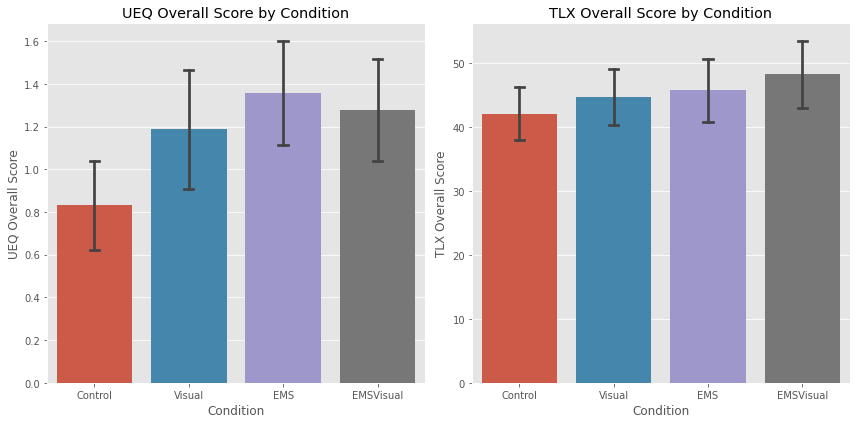

In [14]:

b = 0
def se(a):
    global b
    t = combined_data.iloc[b]['SE Overall']
    b = b + 1
    return (a.mean()+t,a.mean()-t)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

sns.barplot(x='Condition', y='UEQ_Overall', data=combined_data, errorbar=se, capsize=.1 )
plt.title('UEQ Overall Score by Condition')
plt.xlabel('Condition')
plt.ylabel('UEQ Overall Score')

plt.subplot(1, 2, 2)
sns.barplot(x='Condition', y='TLX_Overall', data=combined_data, errorbar="se", capsize=.1)
plt.title('TLX Overall Score by Condition')
plt.xlabel('Condition')
plt.ylabel('TLX Overall Score')
plt.tight_layout()

plt.show()


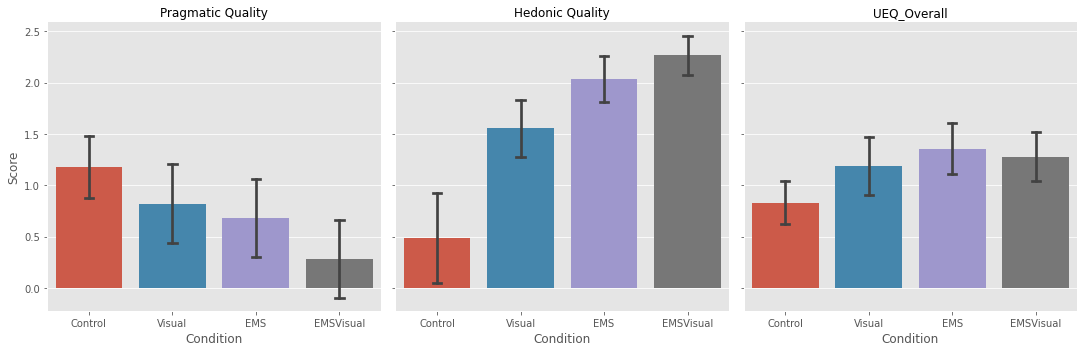

In [15]:

b = 0
c = 'SE Pragmatic Quality'
def se(a):
    global b,c
    if b == 4:
        c = 'SE Hedonic Quality'
    elif b == 8:
        c = 'SE Overall'
    t = combined_data.iloc[b%4][c]
    b = b + 1
    return (a.mean()+t,a.mean()-t)
# Melt the data to get a long-form DataFrame where each row represents a single observation
melted_data = combined_data.melt(id_vars='Condition', value_vars=['Pragmatic Quality','Hedonic Quality','UEQ_Overall'],var_name='Measure', value_name='Score')

# Create a catplot that shows a barplot for each measure
g = sns.catplot(x='Condition', y='Score', col='Measure', data=melted_data, 
                kind='bar', col_wrap=4,errorbar=se, capsize=.1 )
# Adjust the layout
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()


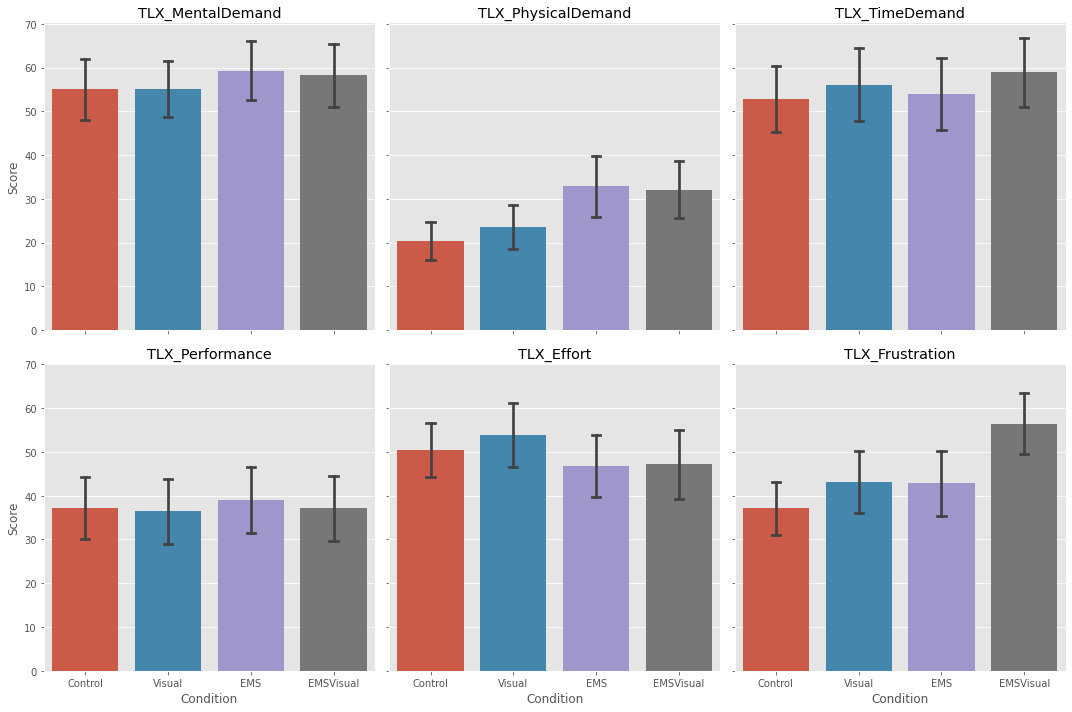

In [16]:
melted_data = combined_data.melt(id_vars='Condition', value_vars=['TLX_MentalDemand', 'TLX_PhysicalDemand', 'TLX_TimeDemand', 'TLX_Performance', 'TLX_Effort', 'TLX_Frustration'], var_name='Measure', value_name='Score')

# Create a mapping for the measures to row and col numbers
mapping = {
    'TLX_MentalDemand': (1, 1), 'TLX_PhysicalDemand': (1, 2), 'TLX_TimeDemand': (1, 3),
    'TLX_Performance': (2, 1), 'TLX_Effort': (2, 2), 'TLX_Frustration': (2, 3),
}

# Create 'Row' and 'Col' columns in the melted data
melted_data['Row'] = melted_data['Measure'].apply(lambda x: mapping[x][0])
melted_data['Col'] = melted_data['Measure'].apply(lambda x: mapping[x][1])

# Create the catplot
g = sns.catplot(x='Condition', y='Score', col='Col', row='Row', data=melted_data, kind='bar', errorbar='se', capsize=.1)

# Manually set the titles based on our mapping
for ax, title in zip(g.axes.flat, ['TLX_MentalDemand', 'TLX_PhysicalDemand', 'TLX_TimeDemand', 'TLX_Performance', 'TLX_Effort', 'TLX_Frustration']):
    ax.set_title(title)

# Adjust layout
plt.tight_layout()
plt.show()


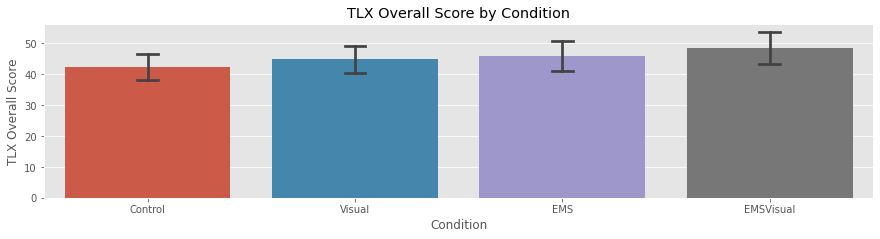

In [17]:
plt.figure(figsize=(24, 6))


plt.subplot(2, 2, 2)
sns.barplot(x='Condition', y='TLX_Overall', data=combined_data, errorbar="se", capsize=.1)
plt.title('TLX Overall Score by Condition')
plt.xlabel('Condition')
plt.ylabel('TLX Overall Score')
plt.tight_layout()

plt.show()

In [18]:
columns = ['TLX_Overall', 'TLX_MentalDemand', 'TLX_PhysicalDemand', 'TLX_TimeDemand', 'TLX_Performance', 'TLX_Effort', 'TLX_Frustration']

# Compute the mean and standard error for each column grouped by the 'Condition' column
grouped_mean = combined_data.groupby('Condition')[columns].mean()
grouped_stderr = combined_data.groupby('Condition')[columns].std() / (combined_data.groupby('Condition').size()**0.5).values[:, None]

# Combine mean and standard error in a MultiIndex DataFrame for neat presentation
result = pd.concat([grouped_mean, grouped_stderr], keys=['Mean', 'Standard Error'], axis=1)

print(result)


                 Mean                                                     \
          TLX_Overall TLX_MentalDemand TLX_PhysicalDemand TLX_TimeDemand   
Condition                                                                  
Control     42.142857        55.000000          20.357143      52.857143   
EMS         45.773810        59.285714          32.857143      53.928571   
EMSVisual   48.333333        58.214286          32.142857      58.928571   
Visual      44.702381        55.000000          23.571429      56.071429   

                                                     Standard Error  \
          TLX_Performance TLX_Effort TLX_Frustration    TLX_Overall   
Condition                                                             
Control         37.142857  50.357143       37.142857       4.170982   
EMS             38.928571  46.785714       42.857143       4.965129   
EMSVisual       37.142857  47.142857       56.428571       5.254511   
Visual          36.428571  53.928571     

In [19]:

print(combined_data['Condition'].unique())

# Run a 2x2 factorial ANOVA for each dependent variable
dependent_vars = ['ErrorCount', 'TotalTime', 'TLX_Overall', 'UEQ_Overall']

for var in dependent_vars:
    model = ols(f'{var} ~ C(Condition)', data=combined_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame
    print(f"\nANOVA results for {var}:\n", anova_table)


['Control' 'Visual' 'EMS' 'EMSVisual']

ANOVA results for ErrorCount:
                  sum_sq    df         F    PR(>F)
C(Condition)   1.857143   3.0  0.325156  0.807147
Residual      99.000000  52.0       NaN       NaN

ANOVA results for TotalTime:
                     sum_sq    df         F    PR(>F)
C(Condition)   3003.663020   3.0  1.411736  0.249813
Residual      36879.048249  52.0       NaN       NaN

ANOVA results for TLX_Overall:
                     sum_sq    df         F    PR(>F)
C(Condition)    276.289683   3.0  0.295295  0.828614
Residual      16217.757937  52.0       NaN       NaN

ANOVA results for UEQ_Overall:
                     sum_sq    df             F  PR(>F)
C(Condition)  2.266462e+00   3.0  2.014669e+30     0.0
Residual      1.949966e-29  52.0           NaN     NaN


In [20]:
# Recode the 'Condition' column into two new columns 'Visual' and 'EMS'
combined_data['Visual'] = combined_data['Condition'].apply(lambda x: 1 if x in ['Visual', 'EMSVisual'] else 0)
combined_data['EMS'] = combined_data['Condition'].apply(lambda x: 1 if x in ['EMS', 'EMSVisual'] else 0)

# Run the interaction ANOVA for each dependent variable
dependent_vars = ['ErrorCount', 'TotalTime', 'TLX_Overall', 'UEQ_Overall']

for var in dependent_vars:
    model = ols(f'{var} ~ C(Visual) * C(EMS)', data=combined_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame
    print(f"\nANOVA results for {var}:\n", anova_table)



ANOVA results for ErrorCount:
                         sum_sq    df             F    PR(>F)
C(Visual)         1.005782e-30   1.0  5.282897e-31  1.000000
C(EMS)            1.785714e+00   1.0  9.379509e-01  0.337288
C(Visual):C(EMS)  7.142857e-02   1.0  3.751804e-02  0.847169
Residual          9.900000e+01  52.0           NaN       NaN

ANOVA results for TotalTime:
                         sum_sq    df         F    PR(>F)
C(Visual)          1097.254631   1.0  1.547145  0.219136
C(EMS)             1260.615928   1.0  1.777487  0.188270
C(Visual):C(EMS)    645.792462   1.0  0.910577  0.344376
Residual          36879.048249  52.0       NaN       NaN

ANOVA results for TLX_Overall:
                         sum_sq    df         F    PR(>F)
C(Visual)            91.716270   1.0  0.294076  0.589937
C(EMS)              184.573413   1.0  0.591809  0.445201
C(Visual):C(EMS)      0.000000   1.0  0.000000  1.000000
Residual          16217.757937  52.0       NaN       NaN

ANOVA results for UEQ_Overal

In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Recode the 'Condition' column into two new columns 'Visual' and 'EMS'
combined_data['Visual'] = combined_data['Condition'].apply(lambda x: 1 if x in ['Visual', 'EMSVisual'] else 0)
combined_data['EMS'] = combined_data['Condition'].apply(lambda x: 1 if x in ['EMS', 'EMSVisual'] else 0)

# Run the interaction ANOVA for each dependent variable
dependent_vars = ['ErrorCount', 'TotalTime', 'TLX_Overall', 'UEQ_Overall']

for var in dependent_vars:
    model = ols(f'{var} ~ C(Visual) * C(EMS)', data=combined_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame
    print(f"\nANOVA results for {var}:\n", anova_table)



ANOVA results for ErrorCount:
                         sum_sq    df             F    PR(>F)
C(Visual)         1.005782e-30   1.0  5.282897e-31  1.000000
C(EMS)            1.785714e+00   1.0  9.379509e-01  0.337288
C(Visual):C(EMS)  7.142857e-02   1.0  3.751804e-02  0.847169
Residual          9.900000e+01  52.0           NaN       NaN

ANOVA results for TotalTime:
                         sum_sq    df         F    PR(>F)
C(Visual)          1097.254631   1.0  1.547145  0.219136
C(EMS)             1260.615928   1.0  1.777487  0.188270
C(Visual):C(EMS)    645.792462   1.0  0.910577  0.344376
Residual          36879.048249  52.0       NaN       NaN

ANOVA results for TLX_Overall:
                         sum_sq    df         F    PR(>F)
C(Visual)            91.716270   1.0  0.294076  0.589937
C(EMS)              184.573413   1.0  0.591809  0.445201
C(Visual):C(EMS)      0.000000   1.0  0.000000  1.000000
Residual          16217.757937  52.0       NaN       NaN

ANOVA results for UEQ_Overal

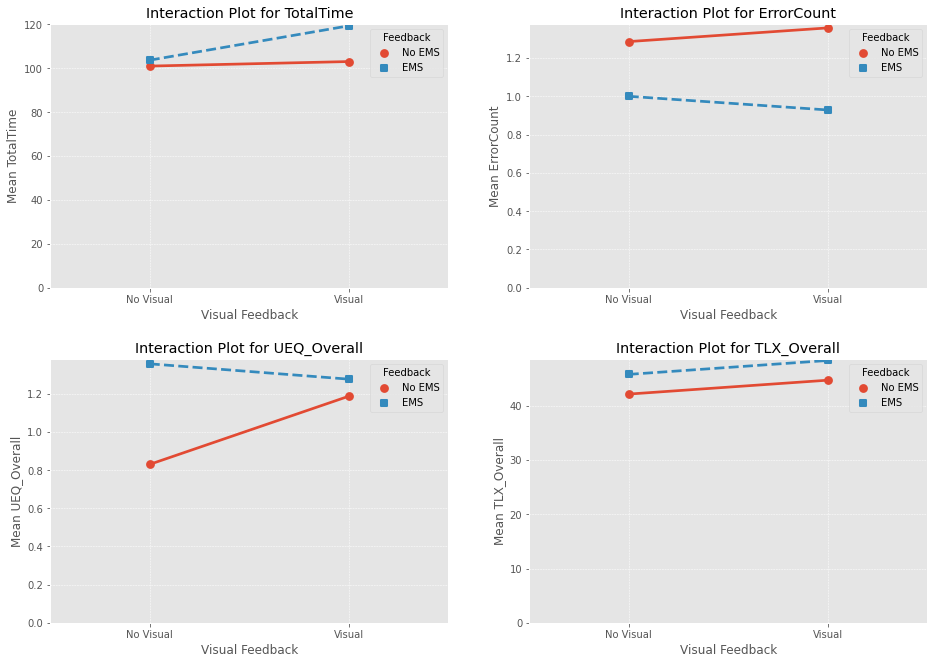

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_interaction(dataframe, dependent_var, ax):
    # Create the interaction plot on a given subplot (ax)
    sns.pointplot(data=dataframe, x='Visual', y=dependent_var, hue='EMS', errorbar=None, markers=["o", "s"], linestyles=["-", "--"], ax=ax)
    # Adjust title and labels
    ax.set_title(f'Interaction Plot for {dependent_var}')
    ax.set_xlabel('Visual Feedback')
    ax.set_ylabel(f'Mean {dependent_var}')
    
    # Rename the legend and x-tick labels
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, title='Feedback', labels=['No EMS', 'EMS'])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No Visual', 'Visual'])
    
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_ylim(bottom=min(dataframe[dependent_var].min(),0))

variables = ['TotalTime', 'ErrorCount', 'UEQ_Overall','TLX_Overall',]

# Set up the subplots layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.tight_layout(pad=5.0)

# Generate the interaction plots
for var, ax in zip(variables, axes.ravel()):
    plot_interaction(combined_data, var, ax)
    
plt.show()


In [23]:

variables = ['ErrorCount', 'TotalTime', 'TLX_Overall', 'UEQ_Overall']

for var in variables:
    model = ols(f'{var} ~ C(Visual) * C(EMS)', data=combined_data).fit()
    print(f"\nSummary for {var}:\n", "-"*50)
    print(model.summary())



Summary for ErrorCount:
 --------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:             ErrorCount   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.3252
Date:                Sun, 03 Sep 2023   Prob (F-statistic):              0.807
Time:                        09:53:28   Log-Likelihood:                -95.414
No. Observations:                  56   AIC:                             198.8
Df Residuals:                      52   BIC:                             206.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------